# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

# Question 1

**Explain how you solve the model**

In [2]:
# code for solving the model (remember documentation and comments)

a = np.array([1,2,3])
b = inauguralproject.square(a)
print(b)

[1 4 9]


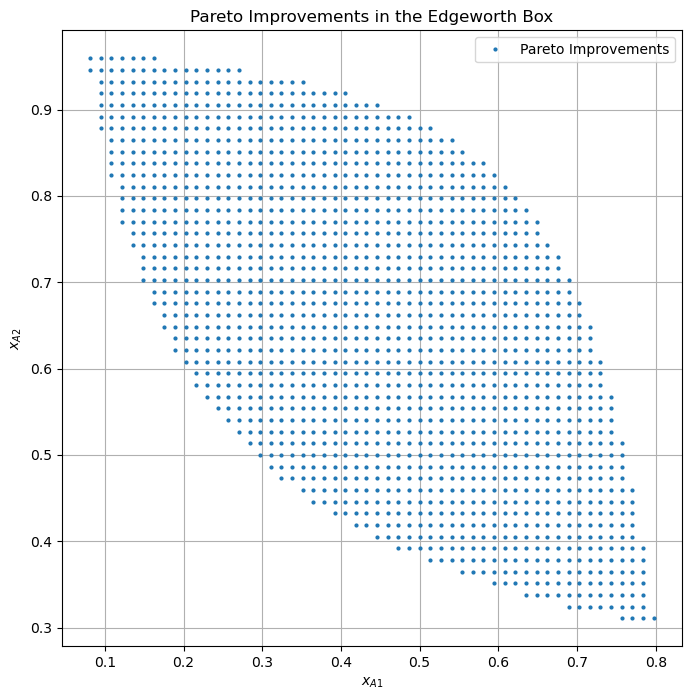

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 1/3
beta = 2/3
omega_A1 = 0.8
omega_A2 = 0.3
omega_B1 = 1 - omega_A1
omega_B2 = 1 - omega_A2
N = 75

# Utility functions
def u_A(x1, x2):
    return x1**alpha * x2**(1-alpha)

def u_B(x1, x2):
    return x1**beta * x2**(1-beta)

# Initial utilities
u_A_initial = u_A(omega_A1, omega_A2)
u_B_initial = u_B(omega_B1, omega_B2)

# Generating xA1 and xA2 values
xA1_values = np.linspace(0, 1, N)
xA2_values = np.linspace(0, 1, N)

# Preparing to store combinations
pareto_improvements = []

# Iterating over xA1 and xA2
for xA1 in xA1_values:
    for xA2 in xA2_values:
        xB1 = 1 - xA1
        xB2 = 1 - xA2
        if u_A(xA1, xA2) >= u_A_initial and u_B(xB1, xB2) >= u_B_initial:
            pareto_improvements.append((xA1, xA2))

# Converting to numpy array for easy plotting
pareto_improvements = np.array(pareto_improvements)

# Plotting
plt.figure(figsize=(8, 8))
plt.plot(pareto_improvements[:, 0], pareto_improvements[:, 1], 'o', markersize=2, label='Pareto Improvements')
plt.xlabel('$x_{A1}$')
plt.ylabel('$x_{A2}$')
plt.title('Pareto Improvements in the Edgeworth Box')
plt.legend()
plt.grid(True)
plt.show()

# Question 2

Explain your code and procedure

In [3]:
# code

# Question 3

Explain your code and procedure

In [4]:
# code

ADD CONCISE CONLUSION.